In [1]:
import os

from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

/home/hicham/miniconda3/envs/phd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def bbox_intersect(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2
    return x2 > x3 and x4 > x1 and y2 > y3 and y4 > y1

In [3]:
def divide_bboxes(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2

    divided_boxes = []
    if x3 > x1:
        divided_boxes.append([x1, y1, x3, y2])  # Left part
    if x4 < x2:
        divided_boxes.append([x4, y1, x2, y2])  # Right part
    if y3 > y1:
        divided_boxes.append([x1, y1, x2, y3])  # Top part
    if y4 < y2:
        divided_boxes.append([x1, y4, x2, y2])  #Bottom part
    return divided_boxes

In [4]:
def area(bbox):
    x1, y1, x2, y2 = bbox
    return (x2 - x1) * (y2 - y1)

In [5]:
# global background_bbox
# background_bbox = [0, 0, 0, 0]
def get_background_bboxes(background_bbox, handled_bbox, bboxes):
    if len(bboxes) != 0:
        bbox = bboxes[0]
        divided_bboxes = divide_bboxes(handled_bbox, bbox)
        for divided_bbox in divided_bboxes:
            if area(divided_bbox) > area(background_bbox):
                get_background_bboxes(background_bbox, divided_bbox, [bb for bb in bboxes if bbox_intersect(divided_bbox, bb)])
    else:
        if area(handled_bbox) > area(background_bbox):
            background_bbox[:] = handled_bbox

In [6]:
dataset = load_dataset("HichTala/coco")

In [7]:
sample = dataset['train'][42738]
image = sample['image']
image_id = sample['image_id']
bboxes = sample['objects']['bbox']
bbox_ids = sample["objects"]["bbox_id"]
labels = sample["objects"]["category"]
sample['image_id']

212380

In [ ]:
bboxes

In [ ]:
dataset

In [ ]:
bboxes

In [ ]:
new_format = []
for bbox in bboxes:
    x1, y1, w, h = bbox
    x2, y2 = w + x1, h + y1
    new_format.append((x1, y1, x2, y2))
bboxes = new_format

In [ ]:
global background_bbox
background_bbox = [0, 0, 0, 0]
get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
background_bbox

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)
plt.show()

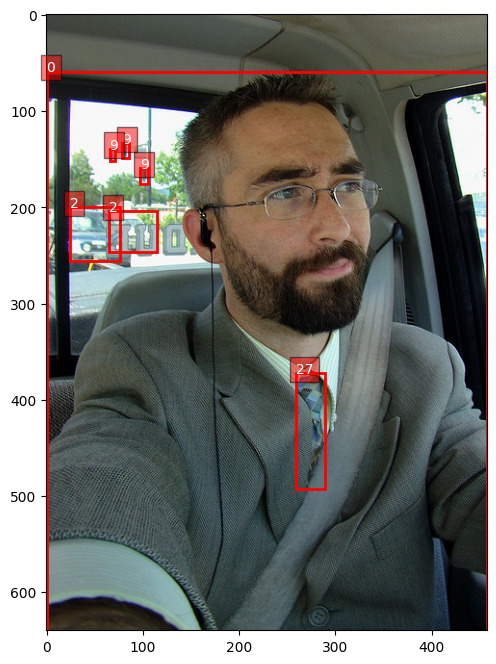

In [9]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    # x1, y1, x2, y2 = bbox
    x1, y1, w, h = bbox
    # w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="white", fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5))

# x1, y1, x2, y2 = background_bbox
# w, h = x2 - x1, y2 - y1
# rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
#                          edgecolor="green", facecolor="none")
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    # x1, y1, x2, y2 = bbox
    x1, y1, w, h = bbox
    # w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    # ax.add_patch(rect)
    # ax.text(x1, y1, label, color="white", fontsize=10,
    #         bbox=dict(facecolor="red", alpha=0.5))

# x1, y1, x2, y2 = background_bbox
# w, h = x2 - x1, y2 - y1
# rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
#                          edgecolor="green", facecolor="none")
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    # x1, y1, x2, y2 = bbox
    x1, y1, w, h = bbox
    # w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    # ax.add_patch(rect)
    # ax.text(x1, y1, label, color="white", fontsize=10,
    #         bbox=dict(facecolor="red", alpha=0.5))

# x1, y1, x2, y2 = background_bbox
# w, h = x2 - x1, y2 - y1
# rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
#                          edgecolor="green", facecolor="none")
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [ ]:
image.crop((x1, y1, x2, y2)).size

In [ ]:
# for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
#     x1, y1, x2, y2 = bbox
#     w, h = x2 - x1, y2 - y1
#     image.crop((x1, y1, x2, y2)).save(f"{image_id}_{bbox_id}.png")

In [ ]:
# labels = ['background'] + dataset["train"].features["objects"]['category'].feature.names
# label2id, id2label = {}, {}
# for i, label in enumerate(labels):
#     label2id[label] = str(i)
#     id2label[str(i)] = label

In [ ]:
# for sample in tqdm(dataset['train']):
#     image = sample['image']
#     image_id = sample['image_id']
#     bboxes = sample['objects']['bbox']
#     bbox_ids = sample["objects"]["bbox_id"]
#     labels = sample["objects"]["category"]
#
#     if image_id == 200365:
#         bboxes.pop(2)
#         labels.pop(2)
#         bbox_ids.pop(2)
#     if image_id == 550395:
#         bboxes.pop()
#         labels.pop()
#         bbox_ids.pop()
#
#     global background_bbox
#     background_bbox = [0, 0, 0, 0]
#     get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
#     w_min, h_min = image.size
#
#     for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
#         x1, y1, x2, y2 = bbox
#         w, h = x2 - x1, y2 - y1
#         w_min = min(w_min, w)
#         h_min = min(h_min, h)
#         os.makedirs(f"dataset/train/{id2label[str(label+1)]}", exist_ok=True)
#         image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label[str(label+1)]}/{image_id}_{bbox_id}.png")
#
#     x1, y1, x2, y2 = background_bbox
#     os.makedirs(f"dataset/train/{id2label['0']}", exist_ok=True)
#     w, h = x2 - x1, y2 - y1
#     if w > w_min/2 and h > h_min/2 and area(background_bbox) > 25:
#         image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label['0']}/{image_id}_background.png")

In [34]:
dataset = load_dataset("imagefolder", data_dir="dataset", drop_labels=False)

In [ ]:
153665 153664 153663 153662 153661 153660 153659

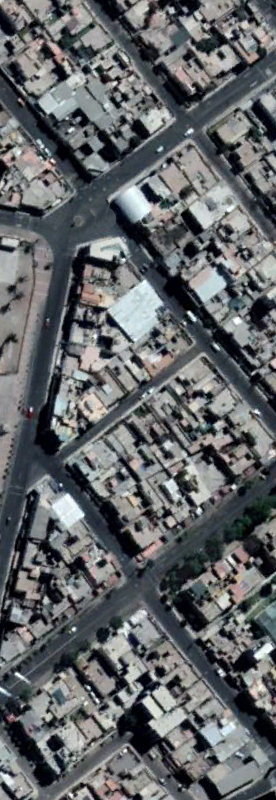

In [27]:
dataset['train'][153665]['image']

In [13]:
dataset['train'] = dataset['train'].filter(
    lambda _, idx: idx != 153665,
    with_indices=True
)

In [10]:
len(dataset["train"])

163911

In [ ]:
def try_push(ds):
    try:
        ds.push_to_hub(
            "HichTala/dior-background",
            max_shard_size="2GB"  # intentionally large to trigger error
        )
        return True
    except Exception as e:
        if "offset overflow" in str(e):
            return False
        raise

do_continue = True
bad_indices = []
while do_continue:
    ds = dataset["train"]

    low, high = 0, len(ds)

    do_continue = False
    while high - low > 1:
        mid = (low + high) // 2
        print(f"Testing range [{low}:{mid}]")
        if try_push(ds.select(range(low, mid))):
            low = mid
        else:
            do_continue = True
            high = mid

    print("Problematic index:", low)
    bad_indices.append(low)
    dataset['train'] = dataset['train'].filter(
        lambda _, idx: idx != low,
        with_indices=True
    )

In [33]:
len(dataset['train'])

153666

In [ ]:
dataset['train'] = dataset['train'].select(range(0, 150000))

In [38]:
dataset.push_to_hub("HichTala/dior-background")



Uploading the dataset shards:   0%|          | 0/5 [00:00<?, ? shards/s]


Map:   0%|          | 0/32000 [00:00<?, ? examples/s]


Map:  20%|██        | 6542/32000 [00:00<00:03, 8157.20 examples/s]


Map:  41%|████      | 13084/32000 [00:02<00:03, 6198.66 examples/s]


Map:  61%|██████▏   | 19626/32000 [00:02<00:01, 8079.54 examples/s]


Map:  82%|████████▏ | 26168/32000 [00:04<00:01, 5528.24 examples/s]


Map: 100%|██████████| 32000/32000 [00:07<00:00, 4566.73 examples/s]



Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]


Creating parquet from Arrow format:  20%|██        | 1/5 [00:00<00:00,  8.16ba/s]


Creating parquet from Arrow format:  40%|████      | 2/5 [00:00<00:00,  3.64ba/s]


Creating parquet from Arrow format:  60%|██████    | 3/5 [00:00<00:00,  3.54ba/s]


Creating parquet from Arrow format:  80%|████████  | 4/5 [00:01<00:00,  1.86ba/s]


Creating parquet from Arrow format: 100%|██████████| 5/5 [00:02<00:00,  2.19ba/s]
Processing Files (0 / 0

ArrowInvalid: offset overflow while concatenating arrays

In [ ]:
for sample in tqdm(dataset['train']):
    image = sample['image']
    image_id = sample['image_id']
    bboxes = sample['objects']['bbox']
    bbox_ids = sample["objects"]["bbox_id"]
    labels = sample["objects"]["category"]

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    global background_bbox
    background_bbox = [0, 0, 0, 0]
    get_background_bboxes(background_bbox, [0, 0, image.size[0], image.size[1]], bboxes)
    w_min, h_min = image.size

    for bbox, bbox_id, label in zip(bboxes, bbox_ids, labels):
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        w_min = min(w_min, w)
        h_min = min(h_min, h)
        os.makedirs(f"dataset/train/{id2label[str(label+1)]}", exist_ok=True)
        image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label[str(label+1)]}/{image_id}_{bbox_id}.png")

    x1, y1, x2, y2 = background_bbox
    os.makedirs(f"dataset/train/{id2label['0']}", exist_ok=True)
    w, h = x2 - x1, y2 - y1
    if w > w_min and h > h_min and area(background_bbox) > 25:
        image.crop((x1, y1, x2, y2)).save(f"dataset/train/{id2label['0']}/{image_id}_background.png")

In [ ]:
dataset = load_dataset("HichTala/coco-background")

In [ ]:
exclude_idx = [17725, 85356, 140667, 243422, 569617, 838562, 838563]

In [ ]:
len(dataset['train'])

In [ ]:
dataset['train'] = dataset['train'].select(
    (
        i for i in range(len(dataset['train']))
        if i not in set(exclude_idx)
    )
)

In [ ]:
for sample in tqdm(dataset['train']):
    image = sample['image']

In [ ]:
dataset['train'][838564]

In [ ]:
dataset.push_to_hub("HichTala/coco-background")

In [ ]:
from datasets import load_dataset
# Full dataset
dataset = load_dataset("HuggingFaceM4/COCO")
print(dataset)

In [ ]:
# Training set only
dataset = load_dataset("rafaelpadilla/coco2017", split="train")

# Validation set only
dataset = load_dataset("rafaelpadilla/coco2017", split="val")

In [ ]:
for sample in tqdm(dataset['train']):
    bboxes = sample['objects']['bbox']
    image_id = sample['image_id']

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        bbox = [x1, y1, w, h]

In [ ]:
sample = new_dataset['train'][36912]
image = sample['image']
image_id = sample['image_id']
bboxes = sample['objects']['bbox']
bbox_ids = sample["objects"]["bbox_id"]
labels = sample["objects"]["category"]
sample['image_id']

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    # x1, y1, x2, y2 = bbox
    x1, y1, w, h = bbox
    # w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="white", fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5))
# ax.add_patch(rect)

# plt.axis("off")
plt.show()

In [ ]:
def change_format(sample):
    image_id = sample['image_id']
    bboxes = sample['objects']['bbox']
    labels = sample["objects"]["category"]
    bbox_ids = sample["objects"]["bbox_id"]

    if image_id == 200365:
        bboxes.pop(2)
        labels.pop(2)
        bbox_ids.pop(2)
    if image_id == 550395:
        bboxes.pop()
        labels.pop()
        bbox_ids.pop()

    new_format = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        w, h = x2 - x1, y2 - y1
        new_format.append((x1, y1, w, h))
    sample['objects']['bbox'] = new_format
    sample['objects']['category'] = labels
    sample['objects']['bbox_id'] = bbox_ids

    return sample

In [ ]:
dataset = load_dataset("detection-datasets/coco")

In [ ]:
sample = dataset['train'][36912]
new_sample = change_format(sample)

In [ ]:
new_sample

In [ ]:
sample

In [ ]:
new_dataset = dataset.map(change_format)

In [ ]:
new_dataset.push_to_hub("HichTala/coco")